> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Week 2: A Data Scientist's most fundamental tools

*Thursday, January 25, 2018*

Today's exercises will be related to chapters 3, 4, 5, 6 from DSfS. The point of these exercises is to refresh your memory on some mathematics and get you comfortable doing computations in code. It's a bit much this time, I admit that, but we're laying the foundation for great things and it's important we cover the (many) basics first.

The exercises today cover:
* Essential Python
* Data visualization
* Linear algebra
* Statistics
* Probability theory

This is the last week where we will be doing Python for the sake of learning Python. If you feel that it is very difficult you should read the chapter in the book carefully. Alternatively, you can go through [Codeacademy's Python course](https://www.codecademy.com/learn/learn-python).

**On explaining your code**: Some of you may be new to solving problems using code. At this point you may be wondering what level of detail I expect from your solutions. This is the guideline: Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly. To quote our friend Einstein: *"Make everything as simple as possible, but not simpler"*. When you optimize for your own future comprehension, other people will also be able to understand what you did.

**Feedback:** Send me anonymous feedback about the exercises, lectures and course in general at http://ulfaslak.com/vent.

## Exercises

### Part 1: Essential Python (DSFS Chapter 2)

>**Ex. 2.1.1**: Why does `5 / 2 == 2` in Python 2.7?

Python 2 uses integer devision!

>**Ex. 2.1.2**: What is the point of using `try` and `except`? Write some code that shows how to use these.

In [8]:
list(enumerate(a))

[(0, 1), (1, 2), (2, 3)]

In [19]:
a = ["hahaha", "omfg", "lool"]
for i, element in enumerate(a, 1):
    try:
        print a[i]
    except IndexError:
        print "done!"

omfg
lool
done!


>**Ex 2.1.3**: Last week you learned about `dict`s, so now you're ready for `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

In [30]:
from collections import defaultdict

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

defdict = defaultdict(list)
for key, value in l:
    print key, value
    defdict[key].append(value)

a 1
b 3
a None
c False
b True
a None


>**Ex 2.1.4**: Take a list `a = list("justreadtheinstructions")` and
1. count the number of times each element occurs using `Counter`,
2. report the two most common elements

>*Hint: you can import `Counter` from `collections`*

In [35]:
from collections import Counter

a = list("justreadtheinstructions")

counter = Counter(a)
counter

Counter({'a': 1,
         'c': 1,
         'd': 1,
         'e': 2,
         'h': 1,
         'i': 2,
         'j': 1,
         'n': 2,
         'o': 1,
         'r': 2,
         's': 3,
         't': 4,
         'u': 2})

In [38]:
[letter for letter, count in counter.most_common()[:2]]

['t', 's']

>**Ex 2.1.5**: Take another list `b = list("ofcourseistillloveyou")` and
1. get the `set` of characters that exist in both `a` and `b` (intersection),
2. get the `set` of characters that exist in either `a` or `b` (union), and
3. compute the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the distinct elements in `a` and `b`.

>*Hint: use the `set` function to get a `set`-type object of distinct elements from a list*

**Note:** If you finish all of today's exercises, either in class or at some point before the next session, I encourage you to read through the rest of Chapter 2 and try coding up some examples with the different functionality that Joel introduces. It will be worth your while.

### Part 2: Visualization (DSFS Chapter 3)

>**Ex. 2.2.1**: Create two lists, `x` and `y`, that each contain 10 numbers of your liking. Using `matplotlib`'s `scatter` function, plot these two lists against each other. Give your figure x and y **axis labels** and a **title**.

>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`* <br>
>***Info***:* From now on, unless otherwise stated, you should always label your axes and title your figure appropriately.*

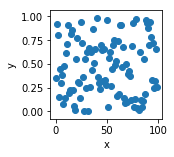

In [49]:
import numpy as np
import matplotlib.pylab as plt

x = range(100)
y = np.random.random(100)

plt.figure(figsize=(2, 2))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

> **Ex. 2.2.2**: The below code returns two lists with numbers. Explain what it does using code comments above or at the end of each line.

In [47]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print "Retrieved %d posts from page %s" % (count, after)
        return data
    
    after = ""

    x, y = [], []
    for n in range(N/count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("gameofthrones", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_7z7l0y
Retrieved 25 posts from page t3_7yslo8
Retrieved 25 posts from page t3_7yajia
Retrieved 25 posts from page t3_7y3i5e
Retrieved 25 posts from page t3_7y0v21
Retrieved 25 posts from page t3_7xg7pz
Retrieved 25 posts from page t3_7xg1an
Retrieved 25 posts from page t3_7x3yn0
Retrieved 25 posts from page t3_7wv68a
Retrieved 25 posts from page t3_7wekl2
Retrieved 25 posts from page t3_7w6wej
Retrieved 25 posts from page t3_7vr52c
Retrieved 25 posts from page t3_7vk7uk
Retrieved 25 posts from page t3_7vcczy
Retrieved 25 posts from page t3_7uzvgh
Retrieved 25 posts from page t3_7uz2in
Retrieved 25 posts from page t3_7ubwwz
Retrieved 25 posts from page t3_7u7uz5
Retrieved 25 posts from page t3_7ty0lz


>**Ex. 2.2.3**: The code above gives you number of the number of comments versus score for 500 posts on the "gameofthrones" subreddit. But the `get_x_y` just needs the name of subreddit to run, so we could give it another, like "news".
1. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "gameofthrones" and (right) x and y for "news". Choose different colors for the points in either plot. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
2. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?

In [54]:
x_got, y_got = get_x_y("gameofthrones", 500, count=25)
x_news, y_news = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_7z7trd
Retrieved 25 posts from page t3_7yrq74
Retrieved 25 posts from page t3_7yd70d
Retrieved 25 posts from page t3_7y95yh
Retrieved 25 posts from page t3_7xz4zk
Retrieved 25 posts from page t3_7xnjkq
Retrieved 25 posts from page t3_7xlakc
Retrieved 25 posts from page t3_7x0e3u
Retrieved 25 posts from page t3_7wndw3
Retrieved 25 posts from page t3_7wfzu0
Retrieved 25 posts from page t3_7wd8hn
Retrieved 25 posts from page t3_7vot0i
Retrieved 25 posts from page t3_7vt9vp
Retrieved 25 posts from page t3_7ve8fy
Retrieved 25 posts from page t3_7v802x
Retrieved 25 posts from page t3_7uny9y
Retrieved 25 posts from page t3_7un9id
Retrieved 25 posts from page t3_7u5xhg
Retrieved 25 posts from page t3_7u5tiv
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_7z96vk
Retrieved 25 posts from page t3_7zdi6i
Retrieved 25 posts from page t3_7zb48t
Retrieved 25 posts from page t3_7z9vi0
Retrieved 25 posts from page t3_7z8y33
Retr

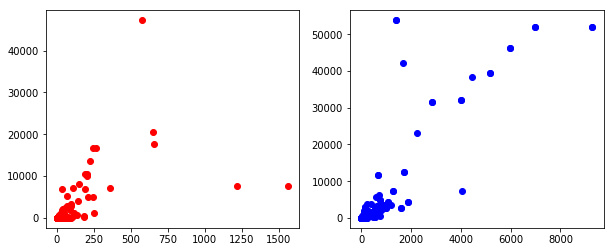

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x_got, y_got, color="red")
ax[1].scatter(x_news, y_news, color="blue")

plt.show()

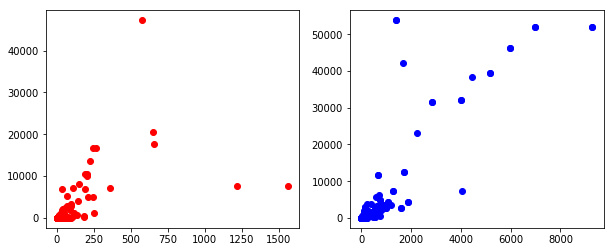

In [61]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(x_got, y_got, color="red")

plt.subplot(1, 2, 2)
plt.scatter(x_news, y_news, color="blue")

plt.show()

>**Ex. 2.2.4**: Looking at the scatter plots there appears to be some unevenness in the number of comments and upvotes that different posts receive.
1. Plot the distributions of `x` for "gameofthrones" and "news" as histograms, side by side. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png).
2. What do these distributions say about how people comment on Reddit?

>**Ex. 2.2.5**: Histograms are great but not perfect for visualizing distributions, so let's try something a little more advanced.
1. Load the `seaborn` package as `sns`. If it isn't installed, you can do so by running `conda install seaborn` in your terminal/console. Take your above code, copy it into the cell below and substitute the `plt.hist` function with `sns.kdeplot`.
2. Your plots probably will look a little noisy. This is because the default value of the `bw` parameter in `kdeplot` is quite small (like 0.1 or something). Increase it until your plots start looking nicer, and explain what `bw` is, and why one should adjust it.

> *Hint: If you get an AttributeError, it's because `seaborn` only accepts data as vectorized `numpy` arrays. You can fix this by importing `numpy` as `np`, and running `x = np.array(x)`, somewhere in your code.*

**Solve**

### Part 3: Linear algebra (DSFS Chapter 4)

>**Ex. 2.3.1**: What does Joel mean when he uses the word *vector*?

A point in a finite dimensioned space.

>**Ex. 2.3.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (that's a dot product)

In [73]:
import numpy as np

# 1.
2 * np.array([2, 3])

# 2. 
np.array([3, 8]) + np.array([6, 1])

# 3.
np.array([3, 8]) * np.array([6, 1])

# 4.
np.dot(np.array([3, 8]), np.array([6, 1]))

26

>**Ex. 2.3.3**: Imagine you have two vectors. What does it mean that the dot product between them is zero or very close to zero? What if it's very large? Intuitively, what does the dot product then measure?

It gives us a sense of the orthogonality (lack of similarity) between two vectors in some space.

>**Ex. 2.3.4**: An $n \times k$ matrix has how many rows and columns? Construct a $5\times5$ *`array`* with `numpy`.

In [76]:
arr = np.random.random(size=(5, 5))
arr

array([[ 0.56283546,  0.97543822,  0.56596794,  0.63697305,  0.33431731],
       [ 0.60918555,  0.88949286,  0.63332594,  0.2297389 ,  0.48408496],
       [ 0.23570218,  0.10957659,  0.36839387,  0.15663458,  0.40737583],
       [ 0.46885636,  0.67214497,  0.47805519,  0.61050144,  0.07177383],
       [ 0.39358344,  0.72419414,  0.21871914,  0.80815382,  0.36699583]])

>**Ex. 2.3.5**: Create a $5 \times 5$ array `X` (a matrix) with random numbers and $5 \times 1$ array `a` (a tall vector) with 5 random numbers, and compute the matrix-vector dot product between these two. Use `numpy`'s `dot` method. What happens if you just use `*`?

### Part 4: Statistics (DSFS Chapter 5)

>**Ex. 2.4.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

>**Ex. 2.4.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How does variance and standard deviation relate? Compute them.
3. What is the interquartile range? Compute it.

In [85]:
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]

In [91]:
# 1
max(a) - min(a)

# 2
print "var", np.var(a)
print "std", np.std(a)

# 3
np.percentile(a, 75) - np.percentile(a, 25)

var 7995336.22222
std 2827.60255733


4.0

>**Ex. 2.4.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What word do we use for that last point?

In [97]:
b = [0, 4, 1, 6, 2, 0, 6, 0, 2]

np.corrcoef(a, b)

array([[ 1.        , -0.05051844],
       [-0.05051844,  1.        ]])

In [98]:
b = [0, 4, 1, 6, 2, 0, 6, 0, 2]

np.corrcoef(a[:-1], b[:-1])

array([[ 1.        ,  0.97660534],
       [ 0.97660534,  1.        ]])

### Part 5: Probability (DSFS Chapter 6)

>**Ex. 2.5.1**: What does it mean that the probabilities of two different events are dependent? Can you give an example of events whose probabilities of occuring depend on each other (name something that is not in the book)?

>**Ex. 2.5.2**: Joel gives an example in the book that illustrates the conditional probablity of “both children are girls” knowing “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older child is a girl". He computes these probabilities with the code below

In [36]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls * 1.0 / older_girl      # 0.514 ~ 1/2
print "P(both | either): ", both_girls * 1.0 / either_girl   # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


>Now imagine a family with three children. Assume the only genders are 'boy' and 'girl' and that their probability of occuring are equal and independent. Write a similar piece of code that computes:
1. the probability of three girls?
1. the probability of two girls and one boy?
1. the probability of one girl and two boys?
1. the probability of three boys?
1. the probability that all children are girls given that the oldest child is a girl?
1. the probability that all children are girls given that one of the children is a girl?

>**Ex. 2.5.3**: Central limit theorem.

>The central limit theorem is fun because we can get Gaussian distributions from probability distributions that are _not_ Gaussian. Let's explore that in the following exercise.
1. Use Python's `random` module to simulate rolling a fair six-sided die `1E7` times. Plot the distribution of dice rolls using a bar-chart. (*Hint: Use `Counter` (see p. 24) to bin the values, then go back to Chapter 3 for examples of how to plot bar-charts.*). Describe the shape of the distribution.
2. Now perform a new simulation. Roll a fair six-sided die 10 times and take the *average*. Do that `1E6` times. Plot the distribution of those average values. This time you can't use `Counter` (since the averages are not integer values). Instead use `numpy.histogram` to distribute those numbers into 25 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
3. Then let's use `matplotlib.pyplot.bar` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
4. Describe the shape of _this_ distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.
5. Calculate the mean and standard deviation of the averaged values. Could you have predicted these values by reading DSfS pp. 78-80?